In [1]:
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import pandas as pd
df = pd.read_csv("datasets/2017_2018_preprocessing3.csv")

before the dataset can be fed to any ml algorithms we have a few more features to remove which will not be involved in prediction, The dataset must be balanced so the certified and denied cases equal each other, all catagorical values must be converted to numeric and all values in the dataset must be scaled

In [2]:
list(df)

['CASE_STATUS',
 'CASE_SUBMITTED',
 'DECISION_DATE',
 'VISA_CLASS',
 'EMPLOYMENT_START_DATE',
 'EMPLOYMENT_END_DATE',
 'EMPLOYER_NAME',
 'JOB_TITLE',
 'SOC_CODE',
 'SOC_NAME',
 'TOTAL_WORKERS',
 'NEW_EMPLOYMENT',
 'CONTINUED_EMPLOYMENT',
 'CHANGE_PREVIOUS_EMPLOYMENT',
 'NEW_CONCURRENT_EMPLOYMENT',
 'CHANGE_EMPLOYER',
 'AMENDED_PETITION',
 'FULL_TIME_POSITION',
 'PREVAILING_WAGE',
 'WAGE_RATE_OF_PAY_FROM',
 'WORKSITE_STATE',
 'wage_diff',
 'regions',
 'applications_per_employer',
 'employer_success_rate',
 'decision_duration',
 'employment_duration']

In [3]:
df = df.drop(["VISA_CLASS","CASE_SUBMITTED", "DECISION_DATE","EMPLOYMENT_START_DATE", "EMPLOYMENT_END_DATE", "EMPLOYER_NAME", "JOB_TITLE", "SOC_CODE"
        , "SOC_NAME", "TOTAL_WORKERS", "NEW_EMPLOYMENT", "CONTINUED_EMPLOYMENT",
        "CHANGE_PREVIOUS_EMPLOYMENT", "NEW_CONCURRENT_EMPLOYMENT", "CHANGE_EMPLOYER", 
        "AMENDED_PETITION","WORKSITE_STATE"], axis=1)

In [4]:
df.head(10)

,CASE_STATUS,FULL_TIME_POSITION,PREVAILING_WAGE,WAGE_RATE_OF_PAY_FROM,wage_diff,regions,applications_per_employer,employer_success_rate,decision_duration,employment_duration
0,CERTIFIED,Y,58032.0,58032.00,0.00,northeast,362,98.6,726,730
1,CERTIFIED,Y,60967.0,95600.00,34633.00,northeast,50,96.0,506,1094
2,CERTIFIED,Y,50398.0,60400.00,10002.00,northeast,362,98.6,331,364
3,CERTIFIED,Y,61069.0,65000.00,3931.00,northeast,362,98.6,277,364
4,CERTIFIED,Y,41392.0,49383.00,7991.00,northeast,362,98.6,219,364
5,CERTIFIED,Y,45198.0,45200.00,2.00,west,2,100.0,206,1096
6,CERTIFIED,Y,78624.0,88381.32,9757.32,midwest,7,100.0,1075,1095
7,CERTIFIED,Y,47247.2,53000.00,5752.80,northeast,528,98.9,999,1095
8,CERTIFIED,Y,60133.0,61347.00,1214.00,midwest,1,100.0,878,1095
9,CERTIFIED,Y,98176.0,104000.00,5824.00,midwest,94,98.9,6,1095


In [5]:
one_hot_regions = pd.get_dummies(df["regions"],prefix='regions')

In [6]:
df = pd.concat([df, one_hot_regions], axis=1)
df = df.drop("regions", axis=1)

In [7]:
df.head()

,CASE_STATUS,FULL_TIME_POSITION,PREVAILING_WAGE,WAGE_RATE_OF_PAY_FROM,wage_diff,applications_per_employer,employer_success_rate,decision_duration,employment_duration,regions_midwest,regions_northeast,regions_other,regions_south,regions_west
0,CERTIFIED,Y,58032.0,58032.0,0.0,362,98.6,726,730,0,1,0,0,0
1,CERTIFIED,Y,60967.0,95600.0,34633.0,50,96.0,506,1094,0,1,0,0,0
2,CERTIFIED,Y,50398.0,60400.0,10002.0,362,98.6,331,364,0,1,0,0,0
3,CERTIFIED,Y,61069.0,65000.0,3931.0,362,98.6,277,364,0,1,0,0,0
4,CERTIFIED,Y,41392.0,49383.0,7991.0,362,98.6,219,364,0,1,0,0,0


In [8]:
df["CASE_STATUS"] = df["CASE_STATUS"].astype('category')
df["case_status_encoded"] = df["CASE_STATUS"].cat.codes
df["FULL_TIME_POSITION"] = df["FULL_TIME_POSITION"].astype('category')
df["full_time_encoded"] = df["FULL_TIME_POSITION"].cat.codes

In [9]:
df.head()

,CASE_STATUS,FULL_TIME_POSITION,PREVAILING_WAGE,WAGE_RATE_OF_PAY_FROM,wage_diff,applications_per_employer,employer_success_rate,decision_duration,employment_duration,regions_midwest,regions_northeast,regions_other,regions_south,regions_west,case_status_encoded,full_time_encoded
0,CERTIFIED,Y,58032.0,58032.0,0.0,362,98.6,726,730,0,1,0,0,0,0,1
1,CERTIFIED,Y,60967.0,95600.0,34633.0,50,96.0,506,1094,0,1,0,0,0,0,1
2,CERTIFIED,Y,50398.0,60400.0,10002.0,362,98.6,331,364,0,1,0,0,0,0,1
3,CERTIFIED,Y,61069.0,65000.0,3931.0,362,98.6,277,364,0,1,0,0,0,0,1
4,CERTIFIED,Y,41392.0,49383.0,7991.0,362,98.6,219,364,0,1,0,0,0,0,1


getting some final info on the dataset before getting the baseline model, case status is now certified: 0 and denied: 1

In [10]:
total = df["CASE_STATUS"].size
case_status_values = df["CASE_STATUS"].value_counts()
denied_percent = case_status_values["DENIED"] / total * 100
print(denied_percent)

1.2246933497570507


In [11]:
case_status_values

CERTIFIED    1087365
DENIED         13482
Name: CASE_STATUS, dtype: int64

the denied case makes up 1.2 percent of the dataset

now i will scale the dataset and drop any colunms

In [12]:
df.head()

,CASE_STATUS,FULL_TIME_POSITION,PREVAILING_WAGE,WAGE_RATE_OF_PAY_FROM,wage_diff,applications_per_employer,employer_success_rate,decision_duration,employment_duration,regions_midwest,regions_northeast,regions_other,regions_south,regions_west,case_status_encoded,full_time_encoded
0,CERTIFIED,Y,58032.0,58032.0,0.0,362,98.6,726,730,0,1,0,0,0,0,1
1,CERTIFIED,Y,60967.0,95600.0,34633.0,50,96.0,506,1094,0,1,0,0,0,0,1
2,CERTIFIED,Y,50398.0,60400.0,10002.0,362,98.6,331,364,0,1,0,0,0,0,1
3,CERTIFIED,Y,61069.0,65000.0,3931.0,362,98.6,277,364,0,1,0,0,0,0,1
4,CERTIFIED,Y,41392.0,49383.0,7991.0,362,98.6,219,364,0,1,0,0,0,0,1


CERTIFIED    1087365
DENIED         13482
Name: CASE_STATUS, dtype: int64


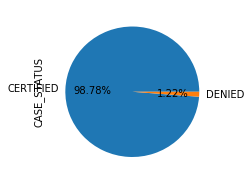

In [13]:
plt.figure(figsize=(3,3))
print(pd.Series(df['CASE_STATUS']).value_counts())
pd.Series(df['CASE_STATUS']).value_counts().plot(kind ='pie', autopct='%1.2f%%')

In [14]:
df = df.drop(["CASE_STATUS", "FULL_TIME_POSITION"],axis=1 )

In [15]:
df.to_csv("datasets/ml_ready_set_unbalanced.csv", index=False)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

c:\users\aidan\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int8, uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\aidan\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int8, uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [17]:
scaled_df.mean(axis = 0)

array([ 3.49318051e-16,  9.89708660e-16, -5.13262591e-17, -3.08267371e-17,
       -1.82509000e-15, -4.49233857e-17,  8.34748797e-16, -6.24667424e-17,
        3.37958114e-17,  4.95706325e-18, -8.68389701e-17,  2.38042308e-17,
        1.42515569e-17, -1.16000444e-16])

In [18]:
scaled_df.std(axis = 0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])